# covid_deaths_vs_cases

For most of the COVID-19 pandemic, the daily focus has been on the number of cases. 

This still seems to be true as the omicron wave hits.

But omicron on the whole has been much milder. For those who are recently doubly or triple vaccinated and/or recently infected who are free from underlying comorbidities (of which the list is long), the risk of death is very small. The primary risk of this phase of the pandemic is for those not in the above groups getting sick all at once, overwhelming available beds, while the healthcare workforce is itself depleted as workers quarantine or are at home with (usually mild) symptoms.

I thought an interesting way to visualize differences in the various peaks would be by plotting deaths as a function of cases.

The below function, `plot_deaths_vs_cases`, does this.

It is not the prettiest, but it does the job.

Among (many) possible improvements:

- label the peaks dynamically
- better colors (ideally one per peak)
- make sure labels are always within axes
- a 3D plot to show each country in relation to the others (z-axis: country), since the x- and y-axis scales differ so much
- active mouseover for date and other contextual information (e.g. percent vaccinated, percent each named variant)

The comments below are as of January 8, 2022.

-- Ramy Arnaout, MD, DPhil

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from colour import Color

/Users/ramy/.pyenv/versions/3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Data is from https://github.com/owid/covid-19-data, specifically from JHU (public > data > jhu):

In [2]:
cases  = "https://github.com/owid/covid-19-data/raw/master/public/data/jhu/biweekly_cases_per_million.csv"
deaths = "https://github.com/owid/covid-19-data/raw/master/public/data/jhu/biweekly_deaths_per_million.csv"
df_cases  = pd.read_csv(cases)
df_deaths = pd.read_csv(deaths)

In [65]:
def plot_deaths_vs_cases(country="United States",
                        min_width = 0.5,
                        max_width = 5,
                        start = Color("black"),
                        mid = Color("slategray"),
                        end = Color("red"), 
                        text_at = (0, 125, 295, 475, -1),
                        ):
    #
    # imports
    import pandas as pd
    import numpy as np
    from matplotlib import pyplot as plt
    from colour import Color
    #
    # get data
    df = pd.DataFrame({
        "dates": df_cases['date'],
        "cases": df_cases[country],
        "deaths": df_deaths[country]
         })
    df = df.dropna()
    cases  = list(df.cases)
    deaths = list(df.deaths)
    dates = list(df.dates)
    first_date = dates[0]
    last_date = dates[-1]
    L = len(df)
    #
    # set cosmetics
    colors =  list(i.hex for i in start.range_to(mid, int(round(L/2))))
    colors += list(i.hex for i in mid.range_to(end, int(round(L/2))))
    alphas = [i/L for i in range(L)]
    widths = [(max_width-min_width)*(i/L)**2+min_width for i in range(L)]
    #
    # create figure
    plt.figure(figsize=(5,5))
    for i in range(L-1):
        plt.plot(cases[i:i+2], deaths[i:i+2], c=colors[i], linewidth=widths[i]) #, alpha=alphas[i])
    #
    # some text
    for i in text_at:
        plt.text(cases[i], deaths[i], dates[i], color=colors[i])
    #
    # apply cosmetics    
    plt.xlabel("Biweekly cases per million")
    plt.ylabel("Biweekly deaths per million")
    plt.tight_layout()
    plt.title(f"{country} Deaths vs. Cases,\n{first_date} to {last_date}")
    plt.tight_layout()
    plt.show()
    return

Let's look at some examples. In all the plots below, black -> gray is earler, and green -> orange -> red is later, with the final timepoint in red.

## South Africa

South Africa had one of the earliest omicron waves.

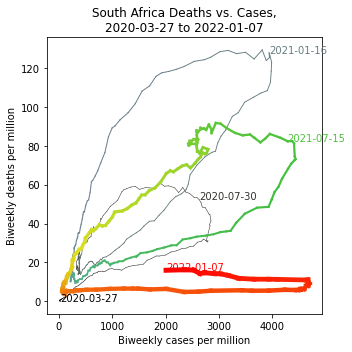

In [53]:
plot_deaths_vs_cases("South Africa")

Note the loops. Cases rise, then deaths rise, then cases fall, and finally deaths fall, in a counterclockwise loop.

The alpha, beta, delta, and omicron waves are clearly visible. Two midsommar peaks, two mid-winter peaks.

The shape and area of each loop indicates the lag time between getting sick and dying, and also the deadliness of each wave.

## United States

Testing (and therefore the number of cases) has remained difficult to get and deaths have remained stubbornly high in the United States.

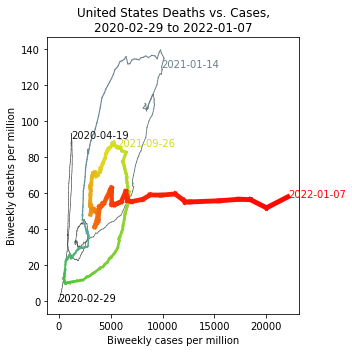

In [54]:
plot_deaths_vs_cases("United States", text_at=(0, 50, 320, 575, -1))

The omicron wave has begun quite differently from previous waves. Hopefully it resolves as South Africa's has so far.

## Netherlands

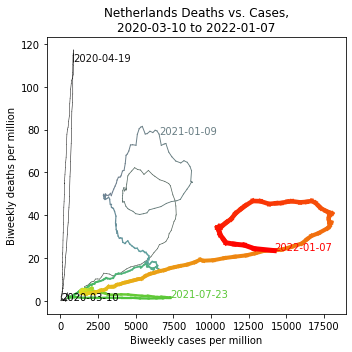

In [55]:
plot_deaths_vs_cases("Netherlands", text_at=(0, 40, 305, 500, -1))

The green wave, which was dominated by the delta variant in other countries, was relatively mild compared to the current wave (red).

## Denmark

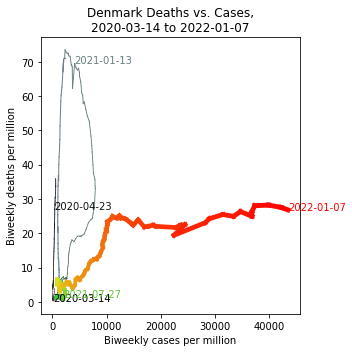

In [56]:
plot_deaths_vs_cases("Denmark", text_at=(0, 40, 305, 500, -1))

A lot of virus sequencing in Denmark. A relatively quiet pandemic until omicron.

## United Kingdom

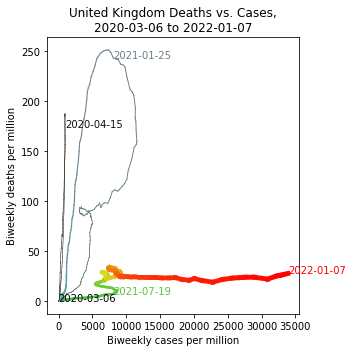

In [57]:
plot_deaths_vs_cases("United Kingdom", text_at=(0, 40, 325, 500, -1))

A relatively mild delta wave.

## Sweden

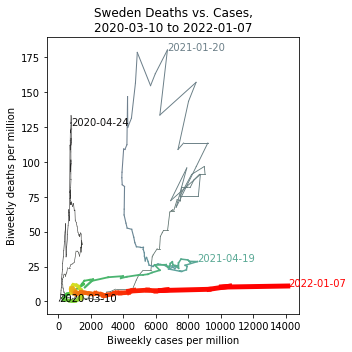

In [58]:
plot_deaths_vs_cases("Sweden", text_at=(0, 45, 316, 405, -1))

The spikiness suggests to me a data-reporting issue. A spike in April 2021.

## Germany

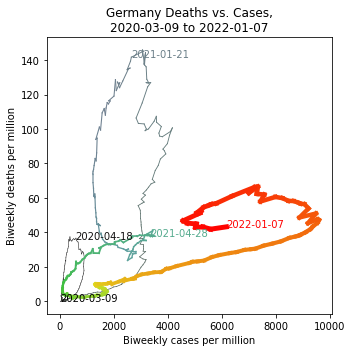

In [59]:
plot_deaths_vs_cases("Germany", text_at=(0, 40, 318, 415, -1))

The second-most populous European country. Fewer loops, but again a dramatic difference in loop orientation, illustrating much different effect. Suspect omicron is yet to hit.

## Israel

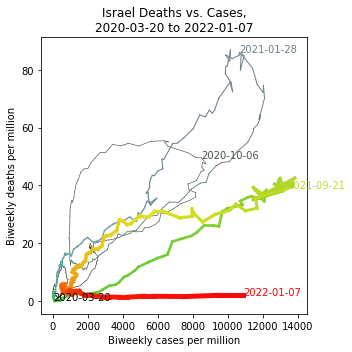

In [60]:
plot_deaths_vs_cases("Israel", text_at=(0, 200, 314, 550, -1))

A highly vaccinated population. Omicron deaths are quite low. As with South Africa, note the flattening of subsequent waves, indicating progressive fall in case mortality.

## Japan

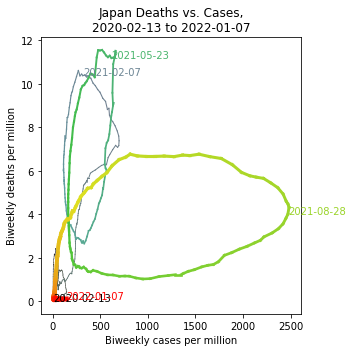

In [61]:
plot_deaths_vs_cases("Japan", text_at=(0, 360, 465, 562, -1))

The August 2021 peak saw many more cases but many fewer deaths than the two previous ones. What changed for Japan between May and August? The omicron wave has yet to hit Japan... or if this is it, it is remarkable.

## China

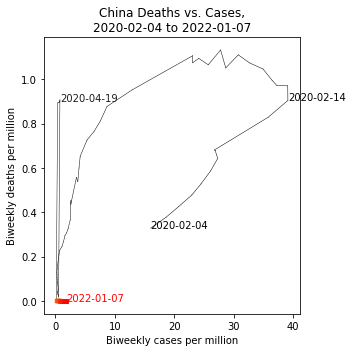

In [62]:
plot_deaths_vs_cases("China", text_at=(0, 10, 75, -1))

A zero-COVID policy. Very different trajectories. Note the axis units.

## Australia

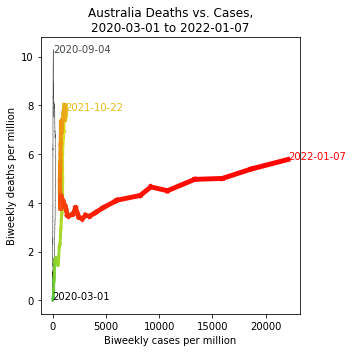

In [63]:
plot_deaths_vs_cases("Australia", text_at=(0, 187, 600, -1))

Another country with tight controls. In January 2021 Australia decided omicron was uncontainable.

## New Zealand

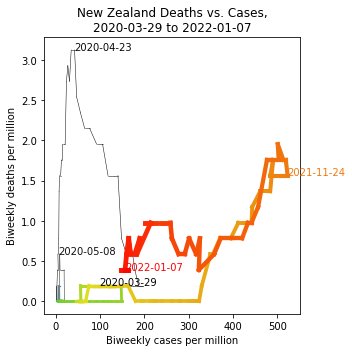

In [64]:
plot_deaths_vs_cases("New Zealand", text_at=(0, 25, 40, 605, -1))

Small, distant, tight controls, unified populace, distinctive trajectories.